In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
pd.set_option("precision", 10)
import os

In [2]:
train=pd.read_csv("../input/kgp-datathon-second/KGPDT2/PricingData.csv")

In [3]:
train.shape

(30649, 5)

In [4]:
train.head()

,Seat Fare Type 1,Seat Fare Type 2,Bus,Service Date,RecordedAt
0,"900.00,800.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,11-07-2020 16:28
1,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,11-07-2020 19:17
2,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,12-07-2020 09:02
3,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,12-07-2020 10:05
4,"876.00,800.00,767.00,729.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,13-07-2020 01:53


In [5]:
train.isnull().sum()

Seat Fare Type 1    12864
Seat Fare Type 2    17903
Bus                     0
Service Date            0
RecordedAt              0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30649 entries, 0 to 30648
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Seat Fare Type 1  17785 non-null  object
 1   Seat Fare Type 2  12746 non-null  object
 2   Bus               30649 non-null  object
 3   Service Date      30649 non-null  object
 4   RecordedAt        30649 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [7]:
train = pd.concat([train, train['Seat Fare Type 1'].str.split(',', expand=True)], axis=1)

In [8]:
train.columns = train.columns.map(str)

In [9]:
train = train.rename({'0': 'berth1_1','1': 'berth2_1', '2': 'berth3_1','3': 'berth4_1', '4': 'berth5_1','5': 'berth6_1', '6': 'berth7_1'},axis='columns')

In [10]:
train.update(train[['berth1_1','berth2_1','berth3_1','berth4_1', 'berth5_1', 'berth6_1','berth7_1']].fillna(0))

In [11]:
train.head()

,Seat Fare Type 1,Seat Fare Type 2,Bus,Service Date,RecordedAt,berth1_1,berth2_1,berth3_1,berth4_1,berth5_1,berth6_1,berth7_1
0,"900.00,800.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,11-07-2020 16:28,900.00,800.00,0,0,0,0,0
1,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,11-07-2020 19:17,910.00,833.00,795.00,762.00,0,0,0
2,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,12-07-2020 09:02,910.00,833.00,795.00,762.00,0,0,0
3,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,12-07-2020 10:05,910.00,833.00,795.00,762.00,0,0,0
4,"876.00,800.00,767.00,729.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,13-07-2020 01:53,876.00,800.00,767.00,729.00,0,0,0


In [12]:
train = pd.concat([train, train['Seat Fare Type 2'].str.split(',', expand=True)], axis=1)

In [13]:
train.columns = train.columns.map(str)

In [14]:
train = train.rename({'0': 'berth1_2','1': 'berth2_2', '2': 'berth3_2','3': 'berth4_2'},axis='columns')

In [15]:
train.update(train[['berth1_2','berth2_2','berth3_2','berth4_2']].fillna(0))

In [16]:
train.head()

,Seat Fare Type 1,Seat Fare Type 2,Bus,Service Date,RecordedAt,berth1_1,berth2_1,berth3_1,berth4_1,berth5_1,berth6_1,berth7_1,berth1_2,berth2_2,berth3_2,berth4_2
0,"900.00,800.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,11-07-2020 16:28,900.00,800.00,0,0,0,0,0,0,0,0,0
1,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,11-07-2020 19:17,910.00,833.00,795.00,762.00,0,0,0,0,0,0,0
2,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,12-07-2020 09:02,910.00,833.00,795.00,762.00,0,0,0,0,0,0,0
3,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,12-07-2020 10:05,910.00,833.00,795.00,762.00,0,0,0,0,0,0,0
4,"876.00,800.00,767.00,729.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,13-07-2020 01:53,876.00,800.00,767.00,729.00,0,0,0,0,0,0,0


In [17]:
train.drop(['Seat Fare Type 1', 'Seat Fare Type 2','Service Date','RecordedAt'], axis=1, inplace=True)

In [18]:
train.head()

,Bus,berth1_1,berth2_1,berth3_1,berth4_1,berth5_1,berth6_1,berth7_1,berth1_2,berth2_2,berth3_2,berth4_2
0,d6fa79179fda2a77455794637f225962,900.00,800.00,0,0,0,0,0,0,0,0,0
1,d6fa79179fda2a77455794637f225962,910.00,833.00,795.00,762.00,0,0,0,0,0,0,0
2,d6fa79179fda2a77455794637f225962,910.00,833.00,795.00,762.00,0,0,0,0,0,0,0
3,d6fa79179fda2a77455794637f225962,910.00,833.00,795.00,762.00,0,0,0,0,0,0,0
4,d6fa79179fda2a77455794637f225962,876.00,800.00,767.00,729.00,0,0,0,0,0,0,0


In [19]:
train[train.columns[1:]] = train[train.columns[1:]].astype(float)

In [20]:
train.drop_duplicates(keep='first', inplace=True)

In [21]:
id = train["Bus"]
train.drop(['Bus'], axis=1, inplace=True)
reduced_data = train.values

In [22]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
reduced_data = min_max_scaler.fit_transform(reduced_data)

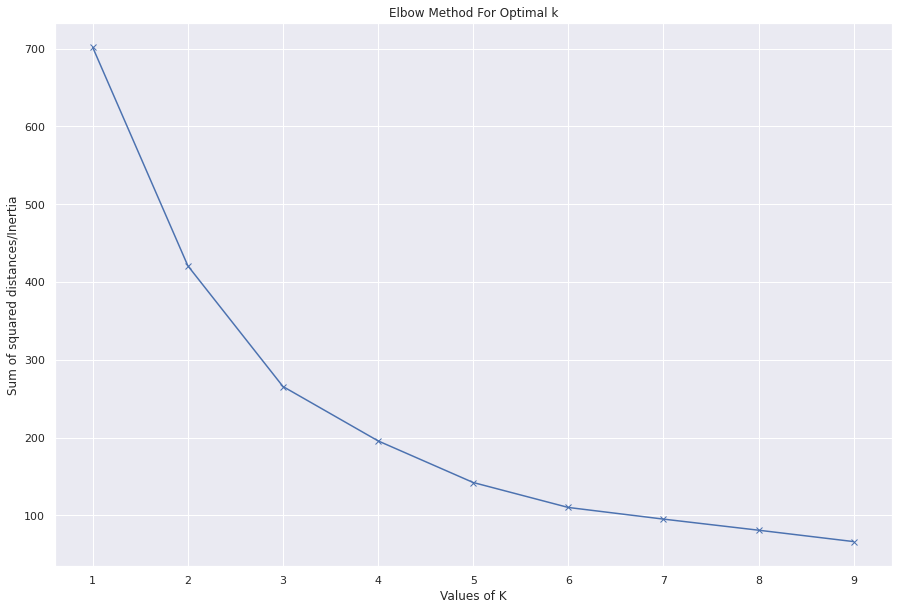

In [23]:
from sklearn.cluster import KMeans
data_frame = reduced_data
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data_frame)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [24]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(train)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [25]:
kmeansmodel = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(reduced_data)

In [26]:
y_k=pd.DataFrame(y_kmeans, columns=['Clusters']) 
train["Clusters"]=y_k

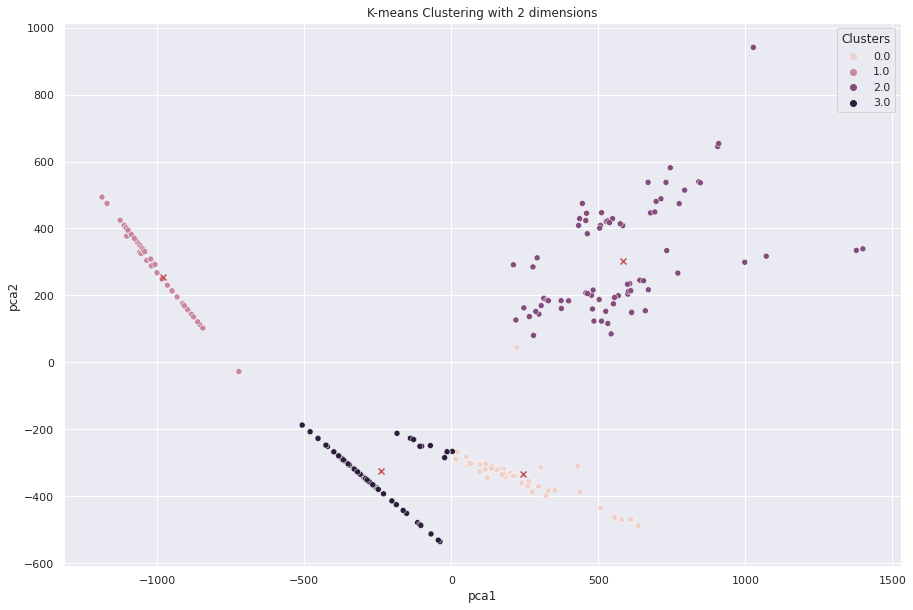

In [27]:
sns.scatterplot(x="pca1", y="pca2", hue=train['Clusters'], data=results)
centers = np.array(kmeansmodel.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [28]:
import numpy.matlib
def soft_clustering_weights(data, cluster_centres, **kwargs):
    
    """
    Function to calculate the weights from soft k-means
    data: Array of data. Features arranged across the columns with each row being a different data point
    cluster_centres: array of cluster centres. Input kmeans.cluster_centres_ directly.
    param: m - keyword argument, fuzziness of the clustering. Default 2
    """

    m = 2
    if 'm' in kwargs:
        m = kwargs['m']
    
    Nclusters = cluster_centres.shape[0]
    Ndp = data.shape[0]
    Nfeatures = data.shape[1]

    EuclidDist = np.zeros((Ndp, Nclusters))
    for i in range(Nclusters):
        EuclidDist[:,i] = np.sum((data-np.matlib.repmat(cluster_centres[i], Ndp, 1))**2,axis=1)
    

    
    invWeight = EuclidDist**(2/(m-1))*np.matlib.repmat(np.sum((1./EuclidDist)**(2/(m-1)),axis=1).reshape(-1,1),1,Nclusters)
    Weight = 1./invWeight
    
    return Weight

In [29]:
for i in range(4):
    train['p' + str(i)] = 0
    
train[['p0', 'p1', 'p2','p3']] = soft_clustering_weights(reduced_data, kmeansmodel.cluster_centers_)

In [30]:
train['confidence'] = np.max(train[['p0', 'p1', 'p2','p3']].values, axis = 1)

In [31]:
train.confidence.describe()

count    1888.0000000000
mean        0.9456247662
std         0.1089649260
min         0.4285538774
25%         0.9604000170
50%         0.9963361375
75%         0.9994258869
max         0.9999999976
Name: confidence, dtype: float64

In [32]:
train["Leader Group ID"]=train[["p0","p1","p2","p3"]].idxmax(axis=1)

In [33]:
train.head()

,berth1_1,berth2_1,berth3_1,berth4_1,berth5_1,berth6_1,berth7_1,berth1_2,berth2_2,berth3_2,berth4_2,Clusters,p0,p1,p2,p3,confidence,Leader Group ID
0,900.0,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9999888115,0.0000001445,0.0000016116,0.0000094324,0.9999888115,p0
1,910.0,833.0,795.0,762.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0032521924,0.0003070949,0.9953740897,0.0010666229,0.9953740897,p2
4,876.0,800.0,767.0,729.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0016480669,0.0001476262,0.9976695367,0.0005347702,0.9976695367,p2
5,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0046759358,0.0022081544,0.0004903656,0.9926255442,0.9926255442,p3
7,800.0,767.0,729.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041604254,0.0001065428,0.9949574202,0.0007756117,0.9949574202,p2


In [34]:
train.reset_index(inplace = True,drop=True)

In [35]:
def closest_leader(x):
    for ele in train[train["Leader Group ID"][x]].sort_values(ascending=True):
        if(ele>train[train["Leader Group ID"][x]][x]):
            element = ele
            pos = train[train[train["Leader Group ID"][x]] == ele].index[0]
            break
        elif(ele==train[train["Leader Group ID"][x]][x]):
            element = ele
            pos = train[train[train["Leader Group ID"][x]] == ele].index[0]
    return element,pos
def closest_follower(x):
    for ele in train[train["Leader Group ID"][x]].sort_values(ascending=False):
        if(ele<train[train["Leader Group ID"][x]][x]):
            return ele, train[train[train["Leader Group ID"][x]] == ele].index[0]
            break

In [36]:
leadcon=[]
for i in range(len(train)):
    leadcon.append(closest_leader(i))
train["sample_lead"]=leadcon

In [37]:
leadfol=[]
for i in range(len(train)):
    leadfol.append(closest_follower(i))
train["sample_follow"]=leadfol

In [38]:
train[['leadscore', 'leadpos']] = pd.DataFrame(train['sample_lead'].tolist(), index=train.index)

In [39]:
train[['folscore', 'folpos']] = pd.DataFrame(train['sample_follow'].tolist(), index=train.index)

In [40]:
train.drop(['sample_lead', 'sample_follow'], axis=1, inplace=True)

In [41]:
id.reset_index(inplace = True, drop = True)

In [42]:
train = pd.concat([train,id],axis=1)

In [43]:
train.head()

,berth1_1,berth2_1,berth3_1,berth4_1,berth5_1,berth6_1,berth7_1,berth1_2,berth2_2,berth3_2,...,p1,p2,p3,confidence,Leader Group ID,leadscore,leadpos,folscore,folpos,Bus
0,900.0,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000001445,0.0000016116,0.0000094324,0.9999888115,p0,0.9999889617,772,0.9999886950,1555,d6fa79179fda2a77455794637f225962
1,910.0,833.0,795.0,762.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0003070949,0.9953740897,0.0010666229,0.9953740897,p2,0.9953760004,1300,0.9953424017,1677,d6fa79179fda2a77455794637f225962
2,876.0,800.0,767.0,729.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0001476262,0.9976695367,0.0005347702,0.9976695367,p2,0.9976741632,1135,0.9976669654,1109,d6fa79179fda2a77455794637f225962
3,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0022081544,0.0004903656,0.9926255442,0.9926255442,p3,0.9930277542,430,0.9925239411,804,d6fa79179fda2a77455794637f225962
4,800.0,767.0,729.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0001065428,0.9949574202,0.0007756117,0.9949574202,p2,0.9949640300,1731,0.9948532417,1304,d6fa79179fda2a77455794637f225962


In [44]:
train["leadpos"]=train["leadpos"].astype(int)
follows=[]
for i in train["leadpos"]:
    follows.append(train["Bus"][i])
train["Follows"]=follows

In [45]:
followedby=[]
for i in train["folpos"]:
    followedby.append(train["Bus"][i])
train["Is followed by"]=followedby

In [46]:
train.drop(['berth1_1', 'berth2_1', 'berth3_1', 'berth4_1', 'berth5_1', 'berth6_1',
       'berth7_1', 'berth1_2', 'berth2_2', 'berth3_2', 'berth4_2', 'Clusters',
       'p0', 'p1', 'p2', 'p3', 'confidence','Leader Group ID','leadpos','folpos'], axis=1, inplace=True)

In [47]:
train = train[['Bus','Follows','leadscore','Is followed by','folscore']]

In [48]:
train.rename({'leadscore': 'Confidence Score (0 to 1)', 'folscore': 'Confidence Score (0 to 1)'}, axis=1, inplace=True)

In [49]:
train.head()

,Bus,Follows,Confidence Score (0 to 1),Is followed by,Confidence Score (0 to 1)
0,d6fa79179fda2a77455794637f225962,6b4c5b251baf9846a4c4273693154363,0.9999889617,a6951a59b64579edcf822ab9ea4c0c83,0.9999886950
1,d6fa79179fda2a77455794637f225962,5580f995d6f4d3bcceca7e2db6c77bf7,0.9953760004,5580f995d6f4d3bcceca7e2db6c77bf7,0.9953424017
2,d6fa79179fda2a77455794637f225962,642c372f4c10a6c0039912b557aa8a22,0.9976741632,22f694bbcef788c5f2f4d44ad39fcdbd,0.9976669654
3,d6fa79179fda2a77455794637f225962,74017231b804c80d3f1fa28be2fe0ffa,0.9930277542,49a138fe484117e03704bcd345a83d32,0.9925239411
4,d6fa79179fda2a77455794637f225962,a6951a59b64579edcf822ab9ea4c0c83,0.9949640300,5580f995d6f4d3bcceca7e2db6c77bf7,0.9948532417


In [50]:
train.to_csv('DLW9383_BandoftheHawk_output.csv',index=False)